In [1]:
import numpy as np
from scipy.linalg import eigvals
import matplotlib.pyplot as plt
from numba import njit

from scipy.sparse import eye, diags

In [2]:
N = 10000
H = diags(np.linspace(-1, 1, N))
a = 0.1

def G_operator(ham, Emax, Emin):
    Emax=Emax+0.05
    Emin=Emin-0.05
    E0 = (Emax - Emin)/2
    Ec = (Emax + Emin)/2
    return (ham - eye(ham.shape[0]) * Ec)/E0


def F_operator(ham, Emax, a):
    Emax=Emax+0.05
    E0 = (Emax**2 - a**2)/2
    Ec = (Emax**2 + a**2)/2
    return (ham @ ham - eye(ham.shape[0]) * Ec)/E0


G = G_operator(H, 1, -1)
F = F_operator(H, 1, a)
a_r = a/1

In [3]:
def low_E_filter(ψ_rand, H, k):
    for i in range(k):
        if i == 0:
            ψ_n = ψ_rand
            continue
            
        if i == 1:
            ψ_nm1 = ψ_n
            ψ_n = H@ψ_nm1
            continue
            
        ψ_np1 = 2*H@ψ_n - ψ_nm1
        ψ_nm1 = ψ_n
        ψ_n = ψ_np1
        
    return ψ_n

def basis(ψ_proj, H, indices):
    ψ_basis = []
    k = indices[-1]
    for i in range(k):
        if i == 0:
            ψ_n = ψ_proj
            continue
            
        if i == 1:
            ψ_nm1 = ψ_n
            ψ_n = H@ψ_nm1
            continue
            
        ψ_np1 = 2*H@ψ_n - ψ_nm1
        ψ_nm1 = ψ_n
        ψ_n = ψ_np1
        
        if i in indices:
            ψ_basis.append(ψ_n)
            
    return ψ_basis

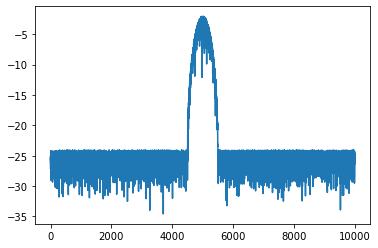

In [4]:
ψ_rand = np.random.rand(N)
ψ_rand = ψ_rand/np.linalg.norm(ψ_rand)
ψ_proj = low_E_filter(ψ_rand, F, int(12/a))
ψ_proj = ψ_proj/np.linalg.norm(ψ_proj)

plt.plot(np.log(np.abs(ψ_proj)))

In [5]:
d = int(a*2*N)
n = int((d*1.5 - 1)/2)
Kd = int(n*np.pi/a_r)
indices = np.arange(np.pi/a_r, (n+1)*np.pi/a_r, np.pi/a_r).astype(int)
ψ_basis = basis(ψ_proj, G, indices)

norm = np.linalg.norm(ψ_basis, axis=1)
ψ_basis = ψ_basis/norm[:, np.newaxis]

In [6]:
S = ψ_basis@ψ_basis.T
H_proj = ψ_basis@H@ψ_basis.T

eigv = eigvals(H_proj, S)

(-0.1, 0.1)

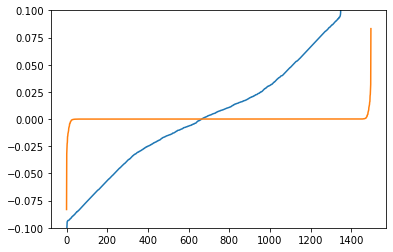

In [7]:
plt.plot(np.sort(np.real(eigv)))
plt.plot(np.sort(np.imag(eigv)))
plt.ylim([-a, a])